# Getting Started

In [21]:
import numpy as np
import sklearn.datasets as data

iris = data.load_iris()
# print('classes = ', iris.target_names)
# print('attributes = ', iris.feature_names)
# print('data = \n', iris.data)
# print('class = \n', iris.target)

X = iris.data
M = len(X)

y = iris.target

x0_min = np.min( X[:,0] )
x0_max = np.max( X[:,0] )
x1_min = np.min( X[:,1] )
x1_max = np.max( X[:,1] )
print(iris.feature_names[0], x0_min, x0_max)
print(iris.feature_names[1], x1_min, x1_max)

sepal length (cm) 4.3 7.9
sepal width (cm) 2.0 4.4


# （1r）Constructing a Set of Classification Rules

In [2]:
import random
import numpy as np
import sklearn.datasets as data

DEBUGGING = False

iris = data.load_iris()
X = iris.data
y = iris.target
M = len(X) # number of the instances
N = len(iris.feature_names) # number of the featrues

if ( DEBUGGING ):
    print('classes = ', iris.target_names)
    print('attributes = ', iris.feature_names)
    print('number of instances = ' + str( M ))
    print('number of attributes = ' + str( N ))
    for i in range( M ):
        print(X[i], y[i])
        
classes = sorted( set( y )) # the three classes
num_classes = len(classes)
if ( DEBUGGING ):
    print('classes = ', classes)
    
    
    
#getting unique values for each attribute
attr_values = []
for i in range (N):
    attr_values.append(sorted(set(X[:,i])))
if ( DEBUGGING ):
    print('attribute values =')
    for i in range( N ):
        print(iris.feature_names[i], attr_values[i])
        
        
        
# build a empyt table(list(list(dic)))
attr_dict = [[ dict() for k in range( len( attr_values[i] )) ] for i in range( N )]

for i in range(N):
    for j in range(len(attr_values[i])):
        for k in range (num_classes):
            attr_dict[i][j][k] = 0

for j in range( M ): # loop through all instances
    c = y[j] # save the class for this instance
    # find index of attribute value X[j,i] in attributes[i]
    for i in range(N):
        k = attr_values[i].index( X[j][i] )
        if ( k < 0 ):
            print('ERROR! (attribute, value) not found: (', i, X[j][i], ')')
        else:
            attr_dict[i][k][c] += 1

            
            
attr_value_class = [[ -1 for k in range(len(attr_values[i]))] for i in range (N)]    
for i in range( N ):
    for k in range( len( attr_values[i] )):
        most_freq = 0
        for c in range( num_classes ):
            if ( attr_dict[i][k][c] > attr_dict[i][k][most_freq] ):
                most_freq = c
        attr_value_class[i][k] = most_freq
# display table of counts and most frequent class for each single attribute
if ( DEBUGGING ):
    for i in range( N ):
        for k in range( len( attr_values[i] )):
            print('attribute ', iris.feature_names[i])
            print(' value ', attr_values[i][k])
            print(' count = (' )
            for c in range( num_classes ):
                print(attr_dict[i][k][c])
            print(')  most frequent=', attr_value_class[i][k])

            
            
rules = [[ -1 for i0 in range( len( attr_values[0] )) ] for i1 in range( len( attr_values[1] )) ]
for j in range (len(attr_values[1])):
    for i in range(len(attr_values[0])):
        c0 = attr_value_class[0][i]
        c1 = attr_value_class[1][j]
        if(c0 == c1):
            rules[j][i] = c0
        elif(attr_dict[0][i][c0] > attr_dict[1][j][c1]):
            rules[j][i] = c0
        elif(attr_dict[0][i][c0] < attr_dict[1][j][c1]):
            rules[j][i] = c1
        else:
            if ( random.random() < 0.5 ):
                rules[j][i] = c0
            else:
                rules[j][i] = c1
print('\nAnd the RULES are...')
if ( False ):
    for k1 in range( len( attr_values[1] )):
        for k0 in range( len( attr_values[0] )):
            print('({},{})=({},{}) -> {} ({})'.format( iris.feature_names[1], iris.feature_names[0], attr_values[1][k1], 
                                                      attr_values[0][k0], rules[k1][k0], iris.target_names[rules[k1][k0]] ))                 

   
    
count = 0.0
# loop through instances
for j in range( M ):
    # find index in attribute values lists for the attribute values in this instance
    k0 = attr_values[0].index( X[j,0] )
    if ( k0 < 0 ):
        print('ERROR finding k0-th attribute: ', X[j,0])
        sys.exit()
    k1 = attr_values[1].index( X[j,1] )
    if ( k1 < 0 ):
        print('ERROR finding k1-th attribute: ', X[j,1])
        sys.exit()
    if ( y[j] == rules[k1][k0] ):
        count += 1
score = ( count / M )
print('number of correct predictions = {} out of {} = {}'.format( count, M, score ))



And the RULES are...
number of correct predictions = 92.0 out of 150 = 0.6133333333333333


# Decision Tree

In [1]:
import sklearn.datasets as data
import sklearn.model_selection as model_select
import sklearn.tree as tree
import sklearn.metrics as metrics


DOT_FILE = '../plots/iris-tree.dot'
DEBUGGING = True

iris = data.load_iris()
if (DEBUGGING):
    print('features:', iris.feature_names)
    print("classes: " ,iris.target_names)
X= iris.data
y = iris.target

X_train,X_test,y_train,y_test = model_select.train_test_split(X,y, random_state=0 )
M_train = len(X_train)
M_test = len(X_test)

if(DEBUGGING):
    print("number of train set:", M_train)
    print("number of test set:", M_test)
    
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)


# predict the labels for the test set
y_hat = clf.predict(X_test)
# count the number of correctly predicted labels
count = 0.0
for i in range(M_test):
    if(y_hat[i] == y_test[i]):
        count += 1
score = count/M_test
print('number of correct predictions = {} out of {} = {}'.format( count, M_test, score ))


print('training score = ', clf.score( X_train, y_train ))
print('test score = ', clf.score( X_test, y_test ))
print('accuracy score = ', metrics.accuracy_score( y_test, y_hat ))


#confusion matrix
cm = metrics.confusion_matrix(y_test,y_hat)
print (cm)
print('precision score = tp / (tp + fp) =')
precision = metrics.precision_score(y_test,y_hat,average = None)
for i in range( len( iris.target_names )):
    print('\t {} = {}'.format( iris.target_names[i], precision[i] ))

print('recall score = tp / (tp + fn) =')
recall = metrics.recall_score(y_test,y_hat,average=None)
for i in range( len( iris.target_names )):
    print('\t {} = {}'.format( iris.target_names[i], recall[i] ))
    
print('f1 score = 2 * (precision * recall) / (precision + recall) =')
f1 = metrics.f1_score(y_test,y_hat,average = None)
for i in range( len( iris.target_names )):
    print('\t {} = {}'.format( iris.target_names[i], f1[i] ))
    

#what does tht tree look like
print('decision path: ')
print(clf.decision_path(X )) 

# output the tree to "dot" format for later visualising
tree.export_graphviz( clf, out_file = DOT_FILE, class_names=iris.target_names, impurity=True )
print('output dot file written to: ', DOT_FILE)
X

features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
classes:  ['setosa' 'versicolor' 'virginica']
number of train set: 112
number of test set: 38
number of correct predictions = 37.0 out of 38 = 0.9736842105263158
training score =  1.0
test score =  0.9736842105263158
accuracy score =  0.9736842105263158
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
precision score = tp / (tp + fp) =
	 setosa = 1.0
	 versicolor = 1.0
	 virginica = 0.9
recall score = tp / (tp + fn) =
	 setosa = 1.0
	 versicolor = 0.9375
	 virginica = 1.0
f1 score = 2 * (precision * recall) / (precision + recall) =
	 setosa = 1.0
	 versicolor = 0.967741935483871
	 virginica = 0.9473684210526316
decision path: 
  (0, 0)	1
  (0, 1)	1
  (1, 0)	1
  (1, 1)	1
  (2, 0)	1
  (2, 1)	1
  (3, 0)	1
  (3, 1)	1
  (4, 0)	1
  (4, 1)	1
  (5, 0)	1
  (5, 1)	1
  (6, 0)	1
  (6, 1)	1
  (7, 0)	1
  (7, 1)	1
  (8, 0)	1
  (8, 1)	1
  (9, 0)	1
  (9, 1)	1
  (10, 0)	1
  (10, 1)	1
  (11, 0)	1
  (11, 1)	1
  (12, 0)	1
  :	

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# logic regression

training score =  0.8392857142857143
test score =  0.7894736842105263
accuracy score =  0.7894736842105263
precision score = tp / (tp + fp) =
	 setosa = 1.0
	 versicolor = 0.7857142857142857
	 virginica = 0.5454545454545454
recall score = tp / (tp + fn) =
	 setosa = 1.0
	 versicolor = 0.6875
	 virginica = 0.6666666666666666
f1 score = 2 * (precision * recall) / (precision + recall) =
	 setosa = 1.0
	 versicolor = 0.7333333333333334
	 virginica = 0.6
mesh score =  1.0


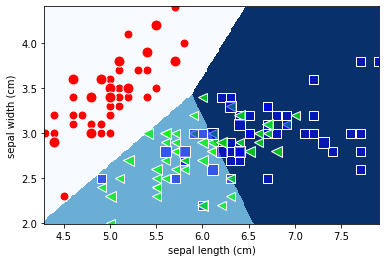

confidence scores shape = (87604, 3)
[[ 1.08891948  1.22188273 -2.3108022 ]
 [ 1.06368114  1.22668743 -2.29036857]
 [ 1.0384428   1.23149214 -2.26993494]
 ...
 [-3.05385564 -0.37604865  3.42990429]
 [-3.07909398 -0.37124394  3.45033792]
 [-3.10433232 -0.36643923  3.47077156]]
y binary shape =  (87604, 3)
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


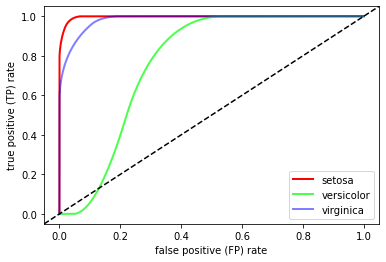

In [34]:
import numpy as np
import sklearn.datasets as data
import sklearn.model_selection as model_select
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import matplotlib.pyplot as plt

STEP_SIZE = 0.01
FILENAME_TAG = '01'
DEBUGGING = False
PLOT_DIR = '../plots/'

iris = data.load_iris()
X = iris.data[:,:2]
y = iris.target
M = len(X)

X_train,X_test,y_train,y_test = model_select.train_test_split(X,y, random_state=0)
M_train = len(X_train)
M_test = len(X_test)

clf = linear_model.LogisticRegression(solver='lbfgs', multi_class='multinomial' )
clf.fit(X_train,y_train)

print('training score = ', clf.score(X_train,y_train))
print('test score = ', clf.score(X_test,y_test))

y_hat = clf.predict(X_test)
print('accuracy score = ', metrics.accuracy_score(y_test,y_hat))

cm = metrics.confusion_matrix(y_test,y_hat)


    
# compute precision, recall and f1 scores
print('precision score = tp / (tp + fp) =')
precision = metrics.precision_score( y_test, y_hat, average=None )
for i in range( len( iris.target_names )):
    # print '\t%s = %f' % ( iris.target_names[i], precision[i] )
    print('\t {} = {}'.format( iris.target_names[i], precision[i] ))

print('recall score = tp / (tp + fn) =')
recall = metrics.recall_score( y_test, y_hat, average=None )
for i in range( len( iris.target_names )):
    # print '\t%s = %f' % ( iris.target_names[i], recall[i] )
    print('\t {} = {}'.format( iris.target_names[i], recall[i] ))

print('f1 score = 2 * (precision * recall) / (precision + recall) =')
f1 = metrics.f1_score( y_test, y_hat, average=None )
for i in range( len( iris.target_names )):
    # print '\t%s = %f' % ( iris.target_names[i], f1[i] )
    print('\t {} = {}'.format( iris.target_names[i], f1[i] ))
    

x0_min = np.min(X[:,0])-STEP_SIZE
x0_max = np.max(X[:,0])+STEP_SIZE
x1_min = np.min(X[:,1])-STEP_SIZE
x1_max = np.max(X[:,1])+STEP_SIZE


x0_range = np.arange( x0_min, x0_max, STEP_SIZE )
x0_len = len( x0_range ) # save number of items in the x0_range array
x1_range = np.arange( x1_min, x1_max, STEP_SIZE )
x1_len = len( x1_range ) # save number of items in the x1_range array

X_pairs = np.zeros(( x0_len * x1_len, 2 ))

i = 0
for i1 in range (x1_len):
    for i0 in range(x0_len):
        X_pairs[i] = np.array([x0_range[i0],x1_range[i1]])
        i+=1 
y_hat_pairs = clf.predict(X_pairs)
print('mesh score = ', clf.score( X_pairs, y_hat_pairs ))

#plot the boundary
plt.figure()
plt.set_cmap( 'Blues' )

# plot the training points
markers = [ 'o','<','s' ]
colours = [ ( 1, 0, 0, 1 ), ( 0, 1, 0, 0.7 ), ( 0, 0, 1, 0.5 ) ]

for i in range( M_train ):
    plt.plot( X_train[i,0], X_train[i,1], marker=markers[y_train[i]], markeredgecolor='w', 
             markerfacecolor=colours[y_train[i]], markersize=9 )

for i in range( M_test ):
    plt.plot( X_test[i,0], X_test[i,1], marker=markers[y_test[i]], markeredgecolor='w', 
             markerfacecolor=colours[y_test[i]], markersize=11 )
    
    
x0_mesh, x1_mesh = np.meshgrid( x0_range, x1_range )
if ( DEBUGGING ):
    print('x0 mesh = ', x0_mesh)
    print('x0 mesh shape = ', np.shape( x0_mesh ))
    print('x1 mesh = ', x1_mesh)
    print('x1 mesh shape = ', np.shape( x1_mesh ))
y_hat_mesh = y_hat_pairs.reshape( x0_mesh.shape )
plt.pcolormesh( x0_mesh, x1_mesh, y_hat_mesh, shading='auto')

plt.xlabel( iris.feature_names[0] )
plt.ylabel( iris.feature_names[1] )
plt.xlim( x0_min, x0_max )
plt.ylim( x1_min, x1_max )
     
plt.show()
plt.close()





# compute ROC curve for each class
conf_scores = clf.decision_function( X_pairs )
if ( True ):
    print('confidence scores shape =', np.shape( conf_scores ))
    print(conf_scores)
     

# binarize the output, since we have a multi-class data set 
y_binary = preprocess.label_binarize( y_hat_pairs, classes=sorted( set( y )) )
if ( True ):
    print('y binary shape = ',np.shape( y_binary ))
    print(y_binary)
    
# starting compute ROC curve
fpr = dict()
tpr = dict()
for c in range( 3 ):
    (fpr[c], tpr[c], tmp) = metrics.roc_curve( y_binary[:,c], conf_scores[:,c] )

    
# plot ROC curve
plt.figure()

for c in range( num_classes ):
    plt.plot( fpr[c], tpr[c], c=colours[c], linewidth=2, label=iris.target_names[c] )
plt.legend( loc='lower right' )
min = -0.05
max = 1.05
plt.plot( [min, max], [min, max], color='k', linestyle='--' )
plt.xlim( [min, max] )
plt.ylim( [min, max] )
plt.xlabel( 'false positive (FP) rate' )
plt.ylabel( 'true positive (TP) rate' )
plt.show()
